In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import scipy.stats as stats
import pylab as pl
from sklearn import metrics  
import pandas as pd
from scipy.stats import linregress
from itertools import combinations 
import pandasql as psql
import glob
import os
import scipy.spatial.distance as dist
import scipy.cluster.hierarchy as hac
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.optimize import minimize, rosen, rosen_der

In [17]:
#path = "C:/Users/bennettf/Desktop/New folder (7)/APSIMsims/"
#path = "D:/Burdekin/apsim_stuff/APSIMsims/"
path = "D:/Burdekin/apsim_stuff/corr/csvs/"
column_name = "Nleached"

In [18]:
data_set = pd.DataFrame()
file_list = os.listdir(path)
for file in file_list :
    # compose a column heading name from the filename
    #file_split = file.split('_')
    #coom$1955_14710_adj$bpafaf$irra.csv
    file_split = file.split('$')
    soil = file_split[0]
    climate = file_split[1]
    #ks = file_split[7].split(' ')[0]
    mgt = file_split[2]
    irrig = file_split[3]
    #heading = soil + '_' + climate + '_' + mgt + '_' + irrig
    heading = mgt
    
    file_in = pd.read_csv(path + file, skiprows=[1])
    data_set[heading] = file_in[column_name]
    
    


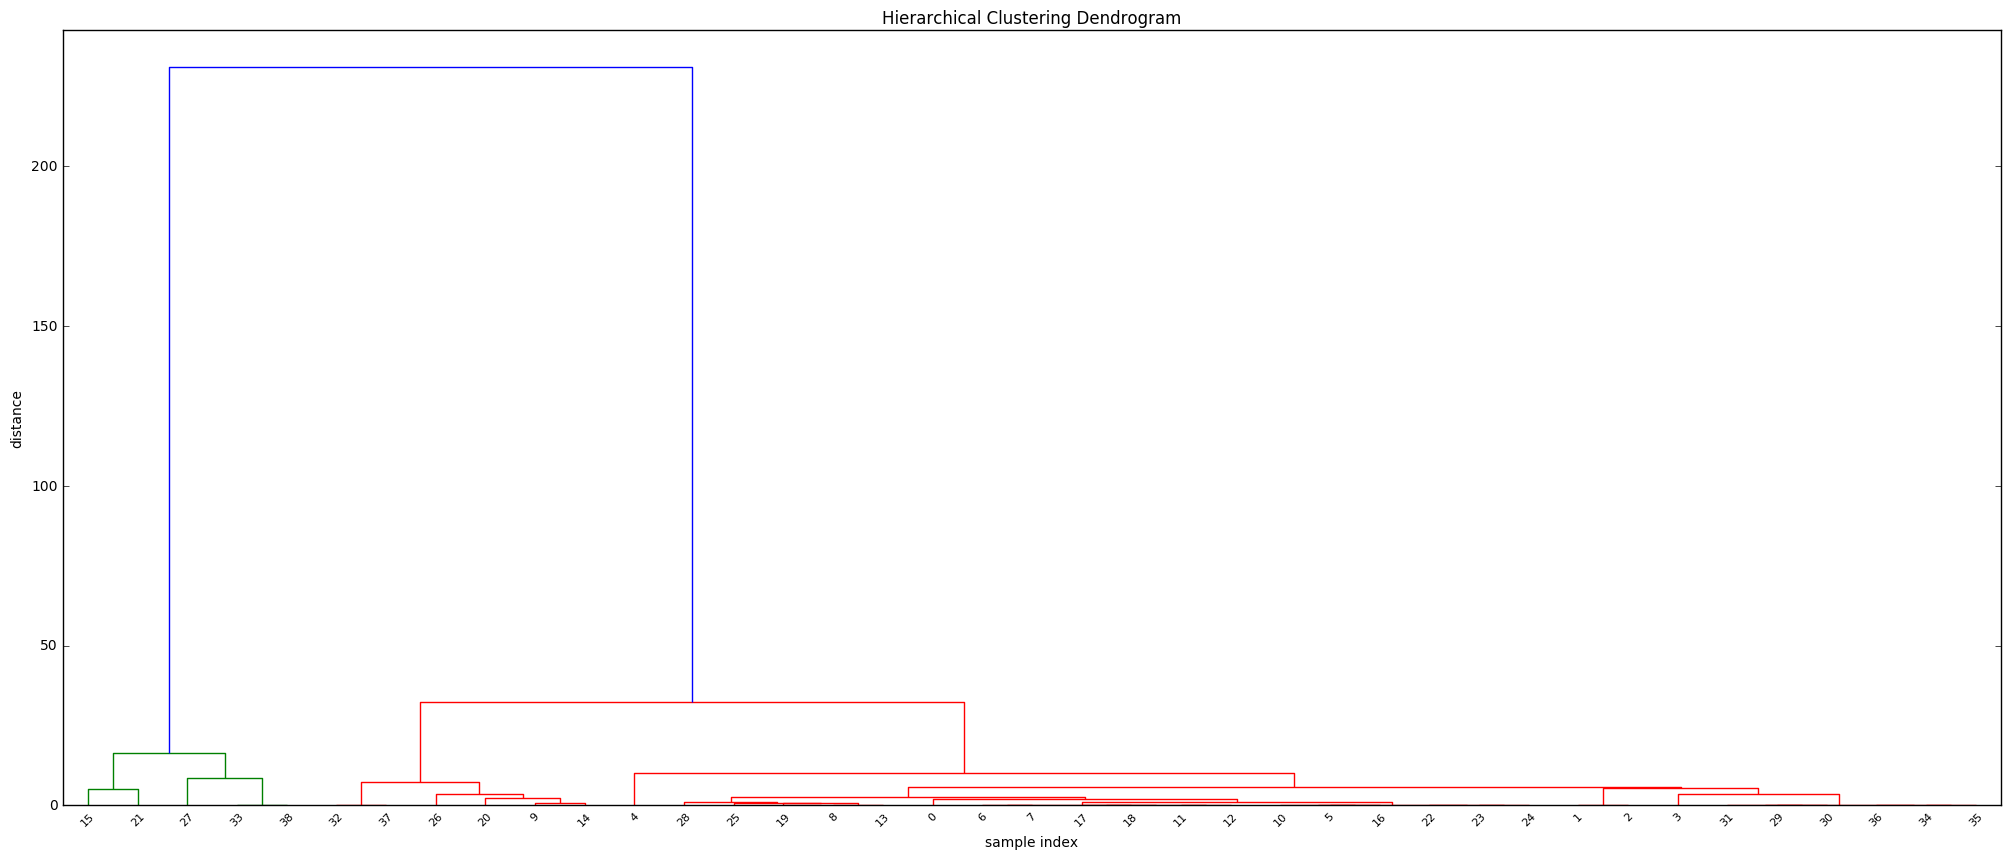

In [19]:
data_matrix = data_set.T.as_matrix()
#distance_matrix = dist.squareform(dist.pdist(data_matrix, 'euclidean' ))
distance_matrix = dist.pdist(data_matrix, 'euclidean' )
Z = hac.linkage(distance_matrix, method='ward', metric='euclidean')
fig = plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dn = dendrogram(Z)
plt.show()

In [26]:
#T = hac.fcluster(Z, 20.0, criterion='distance')
T = hac.fcluster(Z, 6, criterion='maxclust')

In [27]:
T

array([5, 5, 5, 5, 6, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 1, 5, 5, 5, 5, 4, 1, 5,
       5, 5, 5, 4, 3, 5, 5, 5, 5, 4, 2, 5, 5, 5, 4, 2], dtype=int32)

In [28]:
clusters = pd.DataFrame()


clusters['combos'] = list(data_set.columns.values)
clusters['assignments'] = T

In [29]:
clusters.to_csv('D:/Burdekin/apsim_stuff/corr/coom_1955_14710_irrA_groups_' + column_name + '_MaxClust.csv')

In [25]:
len(list(data_set.columns.values))

39

In [33]:
T.r

AttributeError: 'numpy.ndarray' object has no attribute 'r'